**Predicting whether a user will click on a advertisement based on the features of the user**

**Importing Packages** 

importing a few libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')


**Uploading Dataframe**

Read in the advertising.csv file and set it to a data frame called ad_data

In [ ]:
dataframe = pd.read_csv('advertising.csv')

Check the head of ad_data

In [ ]:
dataframe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Use info and describe() on ad_data

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
dataframe.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**Exploratory Data Analysis**

Creating histogram of the Age 

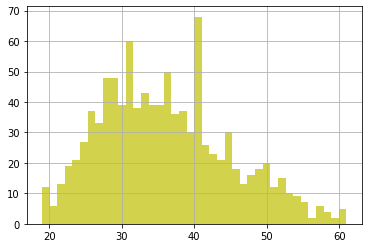

In [ ]:
dataframe['Age'].hist(bins=40,color='y',alpha=0.7)

Create a jointplot showing Area Income versus Age.

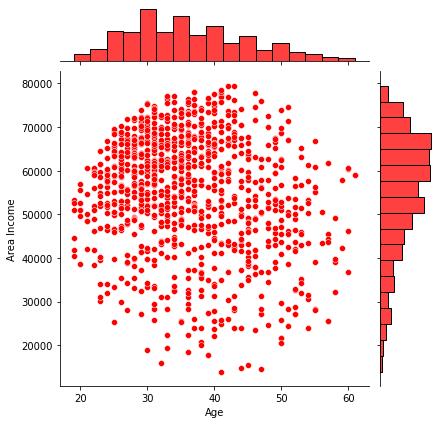

In [ ]:
sns.jointplot(x="Age",y="Area Income",data=dataframe,color='red')

Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

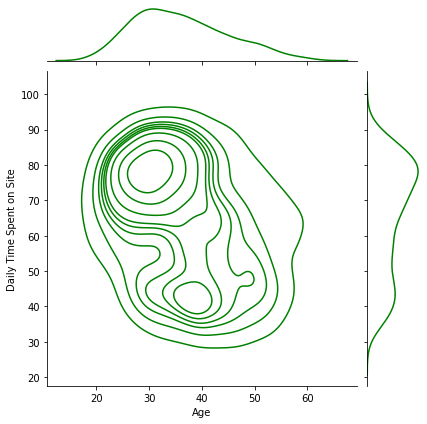

In [ ]:
sns.jointplot(x="Age",y="Daily Time Spent on Site",data=dataframe,kind='kde',color='g')

Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage

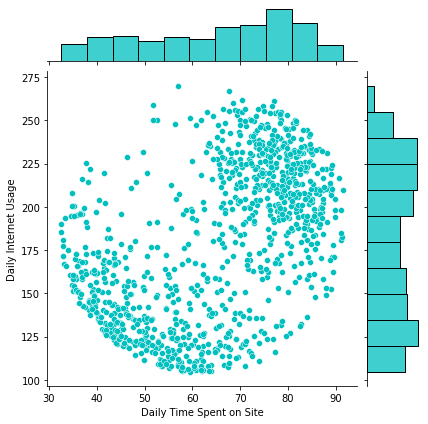

In [ ]:
sns.jointplot(y="Daily Internet Usage",x="Daily Time Spent on Site",data=dataframe,color='c')

Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature

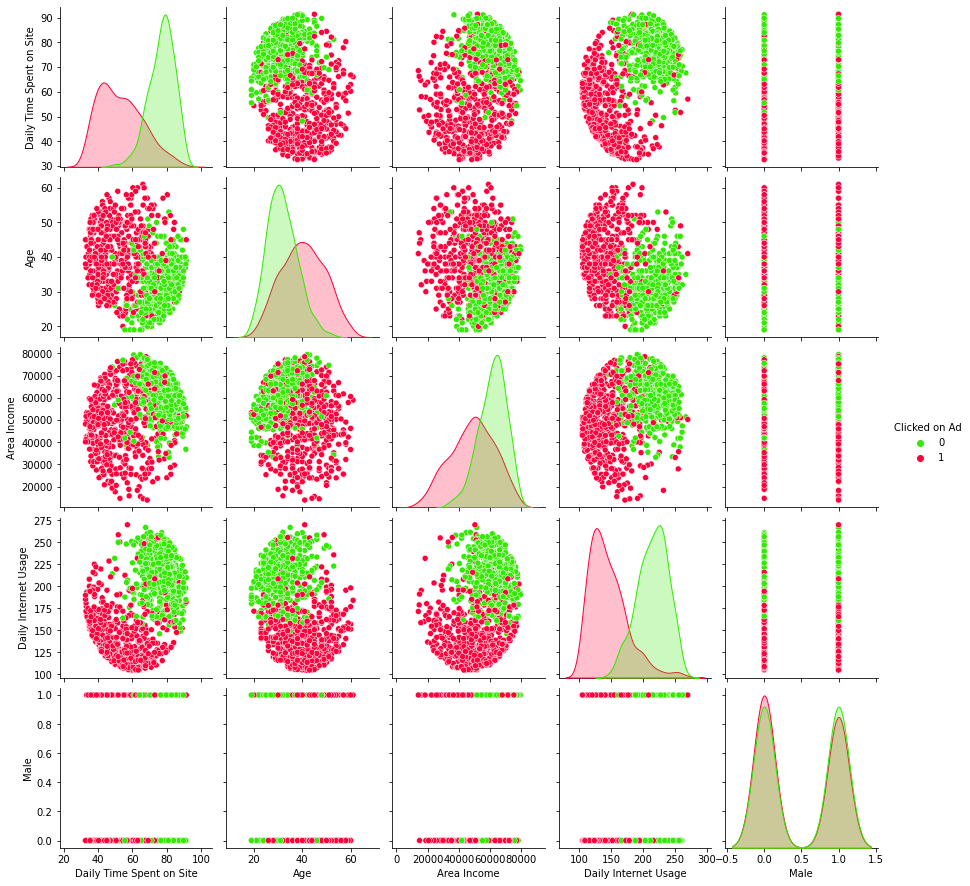

In [ ]:
sns.pairplot(dataframe,hue='Clicked on Ad',palette='prism')

Create a Distplot showing Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


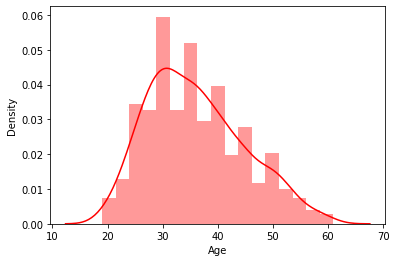

In [ ]:
sns.distplot(dataframe['Age'],color = 'red')

Heat Map

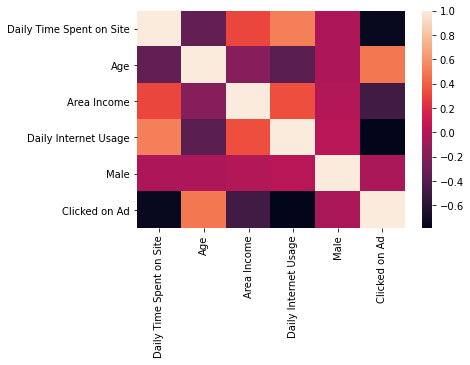

In [ ]:
sns.heatmap(dataframe.corr())

**Naive Bayes**

Split the data into training set and testing set using train_test_split

In [ ]:
X = dataframe[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]

In [ ]:
Y = dataframe['Clicked on Ad']

Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

Train and fit a Naive Bayes model on the training set

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nav_bayes_model = GaussianNB()

In [ ]:
nav_bayes_model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Predictions and Evaluations

In [ ]:
nav_bayes_pred = nav_bayes_model.predict(X_test)

Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,nav_bayes_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       146
           1       0.96      0.96      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

96.0


**Decision Tree**

Split the data into training set and testing set using train_test_split

In [ ]:
X = dataframe[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]

In [ ]:
Y = dataframe['Clicked on Ad']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)


Importing Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Train and fit a Decision Tree model on the training set

In [ ]:
dec_tree_model = DecisionTreeClassifier()

In [ ]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predictions and Evaluations

In [ ]:
dec_tree_pred = dec_tree_model.predict(X_test)

Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,dec_tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       146
           1       0.94      0.93      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Accuracy

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

93.33333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, zero_one_loss

In [ ]:
a=(confusion_matrix(Y_test,dec_tree_pred))
print (a)

[[137   9]
 [ 11 143]]


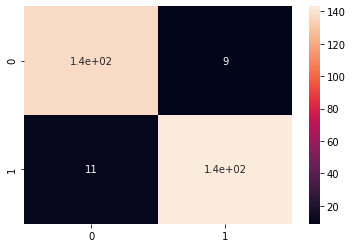

In [ ]:
sns.heatmap(a,annot=True)